Q2 (a)   What can you find from the exploratory data analysis?
Hint: Use what we learned from class to get a good sense of the datasets.
You need to combine the two datasets to understand the data more deeply.
You can also conduct data visualization to understand the data better.
To help you get some ideas, you must first answer the following concrete questions.
-What is the total number of reviews and average review sentiment per zip code?
-What is the total number of reviews and average review sentiment per year?
-Which reviewer (reviewer id) posts the maximum number of reviews? And what is the maximum value? 
Next, you need to come up with your own exploratory data analysis.


In [62]:
import pandas as pd
import numpy as np

from google.colab import files 
uploaded = files.upload()
reviews = pd.read_csv('review_nc_asheville.csv')
reviews.head()

Saving review_nc_asheville.csv to review_nc_asheville (4).csv


,review_id,listing_id,date,reviewer_id,reviewer_name,sentiment
0,198797,38585,3/14/2011,411638,Jessienne,0.639601
1,201932,38585,3/17/2011,441855,Bill,0.861001
2,208898,80713,3/25/2011,334501,Karen,0.337223
3,218405,80713,4/5/2011,452936,Judith,0.332774
4,223393,80713,4/11/2011,469618,Megan,0.336406


In [63]:
import pandas as pd
import numpy as np

from google.colab import files 
uploaded = files.upload()
listings = pd.read_csv('listing_nc_asheville.csv')
listings.head()

Saving listing_nc_asheville.csv to listing_nc_asheville (4).csv


,listing_id,zipcode,latitude,longitude,property_type,room_type,bathrooms,bedrooms,beds,minimum_nights,host_listings_count,instant_bookable,cancellation_policy,is_business_travel_ready,price_per_person,host_is_superhost
0,38585,28804.0,35.651460,-82.627920,Private room in house,Private room,1.0,1.0,2.0,1,1,f,moderate,f,30.000000,t
1,67870,28806.0,35.553707,-82.626297,Guest suite,Entire home/apt,1.0,1.0,1.0,1,2,t,moderate,f,42.500000,t
2,80331,28803.0,35.569150,-82.549715,Bed & Breakfast,Private room,1.0,1.0,1.0,2,4,f,strict,NaN,57.500000,f
3,80713,28801.0,35.586782,-82.549277,House,Private room,1.5,1.0,1.0,1,11,t,strict_14_with_grace_period,f,22.000000,f
4,80905,28801.0,35.597790,-82.555400,Entire loft,Entire home/apt,2.0,3.0,6.0,1,14,t,super_strict_60,f,39.166667,t


In [64]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5257 entries, 0 to 5256
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   listing_id                5257 non-null   int64  
 1   zipcode                   4039 non-null   float64
 2   latitude                  5257 non-null   float64
 3   longitude                 5257 non-null   float64
 4   property_type             5257 non-null   object 
 5   room_type                 5257 non-null   object 
 6   bathrooms                 4071 non-null   float64
 7   bedrooms                  5168 non-null   float64
 8   beds                      5229 non-null   float64
 9   minimum_nights            5257 non-null   int64  
 10  host_listings_count       5257 non-null   int64  
 11  instant_bookable          5257 non-null   object 
 12  cancellation_policy       4072 non-null   object 
 13  is_business_travel_ready  3662 non-null   object 
 14  price_pe

In [65]:
listings.describe()

,listing_id,zipcode,latitude,longitude,bathrooms,bedrooms,beds,minimum_nights,host_listings_count,price_per_person
count,5.257000e+03,4039.000000,5257.000000,5257.000000,4071.000000,5168.000000,5229.000000,5257.000000,5257.000000,5257.000000
mean,2.808420e+07,28794.561525,35.576742,-82.560238,1.396217,1.712461,2.204628,5.161499,85.395282,58.900833
std,1.543715e+07,31.456561,0.047854,0.047946,0.763237,1.218743,1.705063,13.826537,662.112993,300.183795
min,3.858500e+04,28701.000000,35.407400,-82.770131,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,1.557913e+07,28801.000000,35.564360,-82.592560,1.000000,1.000000,1.000000,1.000000,1.000000,25.000000
50%,2.797783e+07,28804.000000,35.586281,-82.558290,1.000000,1.000000,2.000000,2.000000,1.000000,35.000000
75%,4.217439e+07,28806.000000,35.604770,-82.528990,2.000000,2.000000,3.000000,2.000000,4.000000,50.000000
max,5.381698e+07,29710.000000,35.685558,-82.417304,12.500000,34.000000,21.000000,365.000000,7755.000000,12499.500000


In [66]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147339 entries, 0 to 147338
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   review_id      147339 non-null  int64  
 1   listing_id     147339 non-null  int64  
 2   date           147339 non-null  object 
 3   reviewer_id    147339 non-null  int64  
 4   reviewer_name  147339 non-null  object 
 5   sentiment      147339 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 6.7+ MB


In [67]:
reviews.describe()

,review_id,listing_id,reviewer_id,sentiment
count,1.473390e+05,1.473390e+05,1.473390e+05,147339.000000
mean,1.877395e+08,1.141278e+07,6.653603e+07,0.380812
std,1.067412e+08,7.805519e+06,5.794581e+07,0.187726
min,1.987970e+05,3.858500e+04,6.100000e+01,-1.016667
25%,9.388728e+07,4.045013e+06,1.970705e+07,0.265825
50%,1.948376e+08,1.170103e+07,4.820984e+07,0.363233
75%,2.790624e+08,1.793540e+07,1.025723e+08,0.475000
max,3.649326e+08,3.105452e+07,2.331770e+08,2.967021


In [68]:
#What is the total number of reviews per zip code?
import pandas as pd

combinedlistings = pd.merge(listings, reviews, on='listing_id', how='left')
totalreviewsperzipcode = combinedlistings.groupby('zipcode')[['review_id']].count()
totalreviewsperzipcode.rename(columns={'review_id': 'total review/zipcode'}, inplace=True)
print('the total review per zip code is: \n',totalreviewsperzipcode)

the total review per zip code is: 
          total review/zipcode
zipcode                      
28701.0                    20
28704.0                  4155
28715.0                  2499
28730.0                     4
28732.0                  1691
28736.0                     0
28748.0                   170
28759.0                   100
28787.0                    59
28801.0                 39344
28803.0                 18530
28804.0                 15666
28805.0                 17131
28806.0                 46772
28814.0                     0
28815.0                    14
29710.0                     0


In [69]:
#What is the average review sentiment per zip code?
avgreviewsentimentperzipcode = combinedlistings.groupby('zipcode')[['sentiment']].mean()
avgreviewsentimentperzipcode.rename(columns={'sentiment': 'avg review sentiment/zipcode'}, inplace=True)
print('the average sentiment per zip code is: \n',avgreviewsentimentperzipcode)

the average sentiment per zip code is: 
          avg review sentiment/zipcode
zipcode                              
28701.0                      0.366561
28704.0                      0.382080
28715.0                      0.365012
28730.0                      0.233937
28732.0                      0.392760
28736.0                           NaN
28748.0                      0.353509
28759.0                      0.327566
28787.0                      0.355056
28801.0                      0.376376
28803.0                      0.389715
28804.0                      0.377612
28805.0                      0.376374
28806.0                      0.384278
28814.0                           NaN
28815.0                      0.437491
29710.0                           NaN


In [70]:
#total number of reviews per year
import datetime
reviewsdate = reviews
reviewsdate['year'] = pd.to_datetime(reviewsdate['date']).dt.year
totalreviewsperyear = reviewsdate.groupby('year')[['review_id']].count()
totalreviewsperyear.rename(columns={'review_id': 'total number of reviews/year'}, inplace=True)
print('total number of reviews per year: \n',totalreviewsperyear)


total number of reviews per year: 
       total number of reviews/year
year                              
2011                           130
2012                           735
2013                          2054
2014                          5960
2015                         15691
2016                         23155
2017                         39949
2018                         59665


In [71]:
#averag review sentiment per year

avgreviewsentimentperyear = reviewsdate.groupby('year')[['sentiment']].mean()
avgreviewsentimentperyear.rename(columns={'sentiment': 'avg review sentiment/year'}, inplace=True)
print('the average sentiment per year is: \n',avgreviewsentimentperyear)

the average sentiment per year is: 
       avg review sentiment/year
year                           
2011                   0.408427
2012                   0.378910
2013                   0.379679
2014                   0.367379
2015                   0.369193
2016                   0.371065
2017                   0.377564
2018                   0.391170


In [72]:
#which reviewer posts the maximum number of reviews and what is the maximum value ?

maxreviews = reviews.groupby(['reviewer_id','reviewer_name'])[['review_id']].count()
maxreviews = maxreviews.sort_values(by='review_id', ascending=False)
maxreviews.rename(columns={'review_id':'number of reviews'}, inplace=True)
#print('number of reviews per reviewer is: \n', maxreviews)

#maximum number of review
maxreviwer = maxreviews[maxreviews['number of reviews'] == maxreviews['number of reviews'].max()]
print('the reviewer that posted the maximum number of posts, with the number of posts are as follows: \n',maxreviwer)

the reviewer that posted the maximum number of posts, with the number of posts are as follows: 
                            number of reviews
reviewer_id reviewer_name                   
20741182    Connor                        43


In [73]:
#which month has the highest visits (determined by reviews)
print('month with hightest number of reviews:\n')
reviewsdate = reviews
reviewsdate['month'] = pd.to_datetime(reviewsdate['date']).dt.month
totalreviewspermonth = reviewsdate.groupby('month')[['review_id']].count()
#totalreviewspermonth.rename(columns={'review_id': 'total number of reviews/month'}, inplace=True)
totalreviewspermonth = totalreviewspermonth.sort_values(by ="review_id", ascending = False)
totalreviewspermonth.iloc[0:1]


month with hightest number of reviews:



,review_id
month,
10,19286


In [74]:
#which month has the lowest visits (determined by reviews)
print('month with lowest number of reviews:\n')
reviewsdate = reviews
reviewsdate['month'] = pd.to_datetime(reviewsdate['date']).dt.month
totalreviewspermonth = reviewsdate.groupby('month')[['review_id']].count()
#totalreviewspermonth.rename(columns={'review_id': 'total number of reviews/month'}, inplace=True)
totalreviewspermonth = totalreviewspermonth.sort_values(by ="review_id", ascending = True)
totalreviewspermonth.iloc[0:1]

month with lowest number of reviews:



,review_id
month,
2,6041


In [75]:
print('below are different room types with the average sentiment per room type: \n')

totalreviewsperroomtype = combinedlistings.groupby('room_type')[['sentiment']].mean()
totalreviewsperroomtype.rename(columns={'sentiment': 'average sentiment'}, inplace=True)
totalreviewsperroomtype = totalreviewsperroomtype.sort_values(by = "average sentiment", ascending = False)
print(totalreviewsperroomtype)


below are different room types with the average sentiment per room type: 

                 average sentiment
room_type                         
Hotel room                0.412659
Private room              0.398432
Shared room               0.380898
Entire home/apt           0.373277


In [76]:
print('the highest average sentiment is:\n ')
totalreviewsperroomtype.iloc[0:1]


the highest average sentiment is:
 


,average sentiment
room_type,
Hotel room,0.412659


In [77]:
totalreviewsperroomtype = totalreviewsperroomtype.sort_values(by = "average sentiment")
print('the lowest average sentiment is:\n ')
totalreviewsperroomtype.iloc[0:1]

the lowest average sentiment is:
 


,average sentiment
room_type,
Entire home/apt,0.373277


In [78]:
print('below are different number of nights (top 5: with highest reviews) and how many reviews they have received:\n')

totalreviewspernumberofnights = combinedlistings.groupby('minimum_nights')[['review_id']].count()
totalreviewspernumberofnights.rename(columns={'review_id': 'total reviews'}, inplace=True)
totalreviewspernumberofnights = totalreviewspernumberofnights.sort_values(by = "total reviews", ascending = False)
totalreviewspernumberofnights.iloc[0:5]



below are different number of nights (top 5: with highest reviews) and how many reviews they have received:



,total reviews
minimum_nights,
2,63542
1,57411
3,11219
30,9320
28,1126


Q2 (b) What affects the review sentiments?

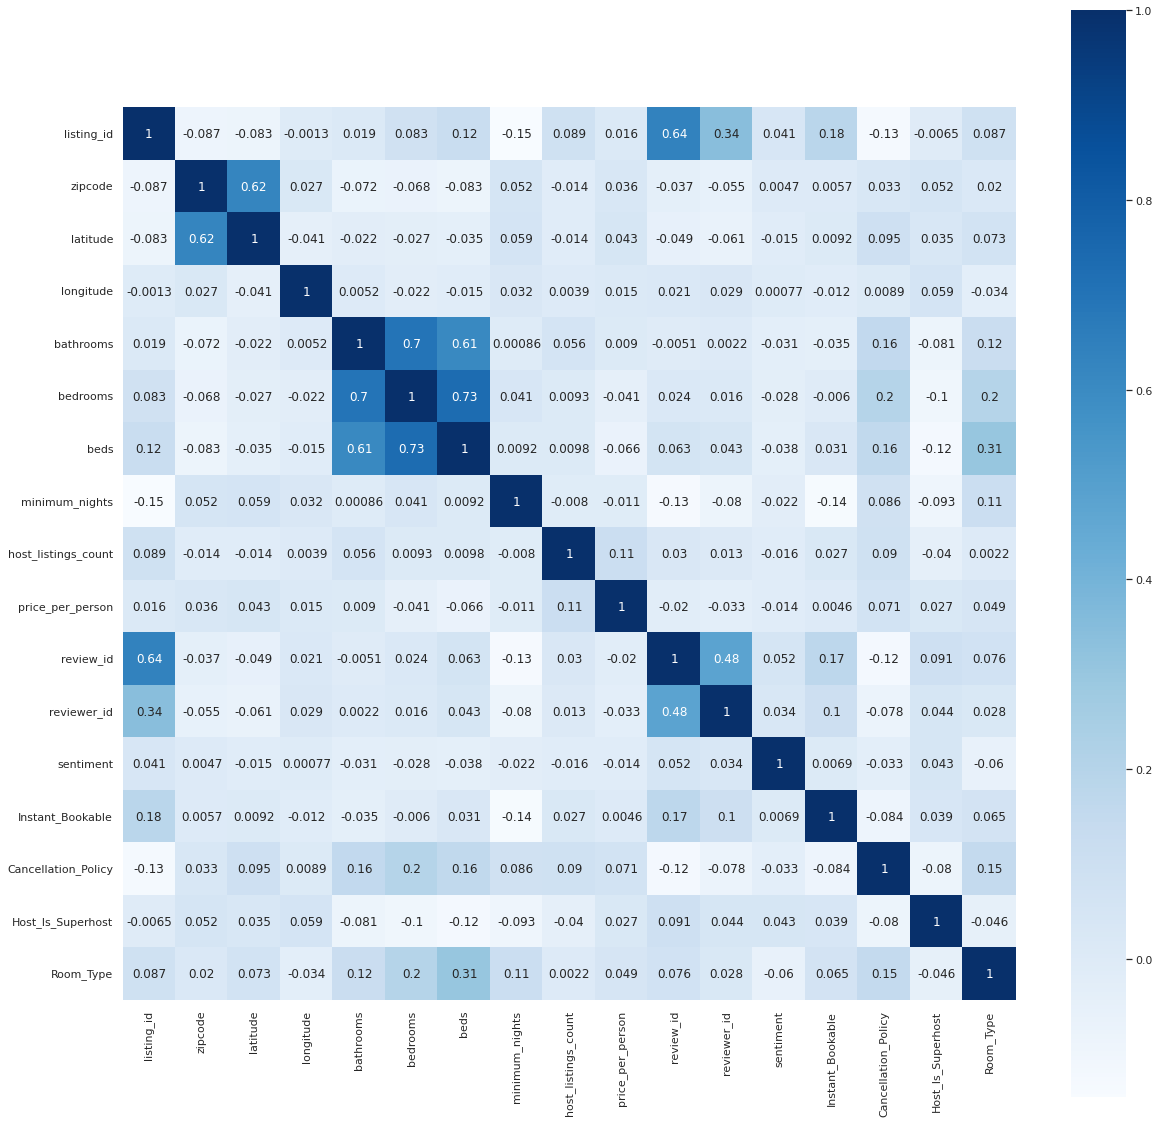

In [80]:
import seaborn as sns

combinedlistings['Instant_Bookable'] = combinedlistings['instant_bookable']
combinedlistings['Instant_Bookable'].replace(['f', 't'],[0, 1], inplace=True)
combinedlistings['Cancellation_Policy'] = combinedlistings['cancellation_policy']
combinedlistings['Cancellation_Policy'].replace(['flexible','moderate','strict_14_with_grace_period','strict','super_strict_30','super_strict_60'],[0,1,2,3,4,5], inplace=True)
combinedlistings['Host_Is_Superhost'] = combinedlistings['host_is_superhost']
combinedlistings['Host_Is_Superhost'].replace(['f', 't'],[0, 1], inplace=True)
combinedlistings['Room_Type'] = combinedlistings['room_type']
combinedlistings['Room_Type'].replace(['Private room', 'Entire home/apt', 'Shared room', 'Hotel room'],[0,1,2,3], inplace=True)
corrmat = combinedlistings.corr()
sns.set(rc = {'figure.figsize':(20,20)})
sns.heatmap(corrmat, square = True , annot=True, cmap="Blues")


(had to convert text values to numerial to check correlation : data cleaning)

The review sentiment is positively correlated by listing_id, zipcode, longitude, review_id, reviewer_id, Instant_bookable and host_is_superhost
That means for every unit increase in these attributes, will lead to a postive increase in sentiment.

Simimlarly for negalively correlated attributes(all the othe attributes- latitude, bathrooms, bedrooms, beds, minimum_nights, host_listing_count, price per person, cancellation policy(increase strictness reduces sentiment) and room type), will lead to decrease of sentiment with an increase of unit of these negatively correlated attributes.


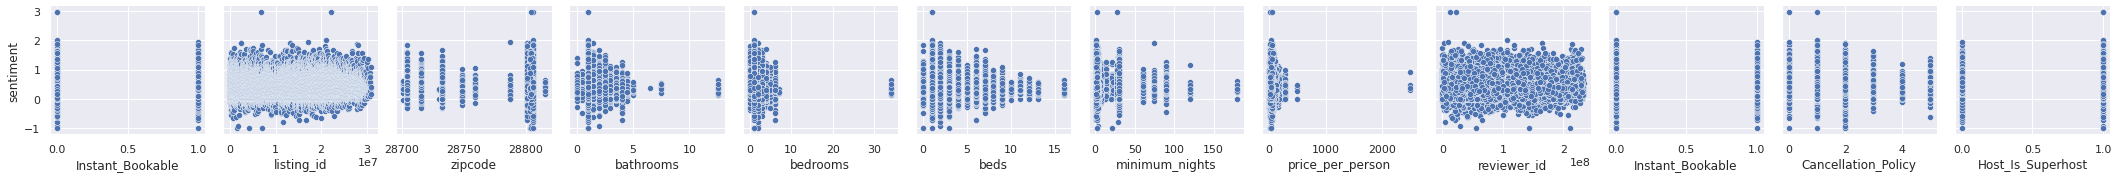

In [81]:
import seaborn as sns

sns.set(rc = {'figure.figsize':(100,100)})
sns.pairplot(data=combinedlistings, y_vars=['sentiment'], x_vars=['Instant_Bookable','listing_id','zipcode','bathrooms','bedrooms','beds','minimum_nights','price_per_person','reviewer_id','Instant_Bookable','Cancellation_Policy','Host_Is_Superhost'])

The pairplot for differnt values tell us a lot about the airbnb reviews and listings in comparision with sentiment (Y axis - dependent variable)

here the X axis is the independent variables (Instant_bookable, listing_id, zipcode, bathrooms, bedrooms, beds, minimum_nights, price per person, cancellation policy, host is super host...)

majority of the zipcode with high sentiments is around 28800
the less number of bathrooms gives better sentiments
the less number of bedrooms gives better sentiments
2-4 number of beds gives better sentiments
the less number of minimum nights gives better sentiments
the less number of price per person gives better sentiments
the less number of flexible cancellation policy gives better sentiments (degree of strictness: flexible -> moderate -> strict_14_with_grace_period -> strict (If you cancel between 7 and 14 days before check-in, you’ll be paid 50% for all nights.) -> super_strict_30 -> super_strict_60)


In [82]:

combinedlistings = combinedlistings.dropna(how = "any")

In [99]:
import statsmodels.api as sm

y1=combinedlistings['sentiment']
X1=combinedlistings[['listing_id','zipcode','latitude', 'longitude', 'bathrooms','bedrooms','beds','minimum_nights','reviewer_id','Instant_Bookable','Cancellation_Policy','Host_Is_Superhost']]
X1=sm.add_constant(X1)
model1 = sm.OLS(y1, X1) 
results1 = model1.fit()
results1.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              sentiment   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     68.44
Date:                Mon, 05 Sep 2022   Prob (F-statistic):          1.52e-167
Time:                        18:52:26   Log-Likelihood:                 34129.
No. Observations:              136517   AIC:                        -6.823e+04
Df Residuals:                  136504   BIC:                        -6.811e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -2.5335      1.216     -2.084      0.037      -4.917      -0.150
listing_id           8.322e-10   7.19e-11     11.577      0.000    6.91e-10    9.73e-10
zipcode                 0.0002   3.22e-05      5.210      0.000       0.000       0.000
latitude               -0.1190      0.017     -6.865      0.000      -0.153      -0.085
longitude              -0.0280      0.012     -2.267      0.023      -0.052      -0.004
bathrooms              -0.0039      0.001     -2.606      0.009      -0.007      -0.001
bedrooms                0.0022      0.001      2.481      0.013       0.000       0.004
beds                   -0.0050      0.001     -8.074      0.000      -0.006      -0.004
minimum_nights         -0.0001   4.74e-05     -2.991      0.003      -0.000   -4.89e-05
reviewer_id          6.959e-11   9.18e-12      7.581      0.000    5.16e-11    8.76e-11
Instant_Bookable       -0.0027      0.001     -2.578      0.010      -0.005      -0.001
Cancellation_Policy    -0.0045      0.001     -6.691      0.000      -0.006      -0.003
Host_Is_Superhost       0.0165      0.001     13.423      0.000       0.014       0.019
==============================================================================
Omnibus:                    26706.873   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           113793.344
Skew:                           0.911   Prob(JB):                         0.00
Kurtosis:                       7.084   Cond. No.                     2.18e+11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.18e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

(for analysis above) The significant variables are listing_id,longitude, latitude,  bathrooms,bedroom, beds, minimum_nights, reviewer_id, cancellation_policy and host_is_superhost.

Since the P-values of these variables are less than 5%.
The R squared value determines the proportion of variance in the dependent variable that can be explained by the independent variable.
In our model, R-squared value = 0.006

The constant value od coefficints help us determine the equation:
y = B0 + X1B1 + X2B2 + X3B3... XNBN
where y = sentiment
B0= -0.6142
 sentiment = -0.6142 + 8.361e(listing_id) + 3.426e(zipcode) -0.1190(latitude) -0.0280(longitude) -0.0042(bathrooms) + 0.0022(bedrooms) -0.005(beds) -0.0001(minimum_nights) +6.959e-11(reviewer_id) -0.0027(Instant_Bookable) -0.0045(Cancellation_Policy) +0.0165(Host_Is_Superhost)

interpretation: with every unit increase in the x variables, the coeffcient times number of units increase/decrease, the sentiment will increase(if coeff. is positive)/decrease(if coeff. is negative).

In [100]:
#Log Y and X -- a one unit increase in X would lead to a β∗100 % increase/decrease in Y.
import numpy as np
import statsmodels.api as sm

combinedlistings['SentimentLog'] = np.log(combinedlistings['sentiment'] + 5)
Y=combinedlistings['SentimentLog']
X=combinedlistings[['listing_id','zipcode', 'latitude', 'longitude', 'bathrooms', 'bedrooms', 'beds', 'minimum_nights', 'host_listings_count', 'Instant_Bookable', 'price_per_person','Cancellation_Policy', 'Host_Is_Superhost']]
X=sm.add_constant(X)
modellog = sm.OLS(Y, X)
resultslog = modellog.fit()
resultslog.summary()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           SentimentLog   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     62.76
Date:                Mon, 05 Sep 2022   Prob (F-statistic):          1.74e-165
Time:                        19:21:29   Log-Likelihood:             2.6563e+05
No. Observations:              136517   AIC:                        -5.312e+05
Df Residuals:                  136503   BIC:                        -5.311e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   1.2307      0.223      5.518      0.000       0.794       1.668
listing_id           1.778e-10   1.27e-11     14.015      0.000    1.53e-10    2.03e-10
zipcode              2.923e-05   5.91e-06      4.947      0.000    1.76e-05    4.08e-05
latitude               -0.0204      0.003     -6.389      0.000      -0.027      -0.014
longitude              -0.0041      0.002     -1.793      0.073      -0.008       0.000
bathrooms              -0.0004      0.000     -1.370      0.171      -0.001       0.000
bedrooms                0.0003      0.000      1.944      0.052   -2.68e-06       0.001
beds                   -0.0010      0.000     -8.872      0.000      -0.001      -0.001
minimum_nights      -2.931e-05    8.7e-06     -3.370      0.001   -4.64e-05   -1.23e-05
host_listings_count -2.022e-05   8.91e-06     -2.270      0.023   -3.77e-05   -2.77e-06
Instant_Bookable       -0.0005      0.000     -2.404      0.016      -0.001   -8.54e-05
price_per_person    -2.422e-05   3.82e-06     -6.334      0.000   -3.17e-05   -1.67e-05
Cancellation_Policy    -0.0007      0.000     -5.231      0.000      -0.001      -0.000
Host_Is_Superhost       0.0032      0.000     14.329      0.000       0.003       0.004
==============================================================================
Omnibus:                    18518.712   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            68294.160
Skew:                           0.660   Prob(JB):                         0.00
Kurtosis:                       6.204   Cond. No.                     3.39e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.39e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**LOG Transformed dependent variable**
interpretation: Log Y and X -- a one unit increase in X would lead to a β∗100 % increase/decrease in Y.
Log Sentiment and X variables. a one unit increase in X would lead to a β∗100 % increase/decrease in Sentiment.
(for analysis above)  The significant variables are listing_id, latitude,   beds, minimum_nights, reviewer_id, cancellation_policy and host_is_superhost.

Since the P-values of these variables are less than 5%.
The R squared value determines the proportion of variance in the dependent variable that can be explained by the independent variable.
In our model, R-squared value = 0.006

The constant value od coefficints help us determine the equation:
log y = B0 + X1B1 + X2B2 + X3B3... XNBN
B0= 1.2307
 log(sentiment) = 1.2307 +1.778e-10(listing_id) + 2.923e-05(zipcode) -0.0204(latitude) -0.0041(longitude) -0.0004(bathrooms) + 0.0003(bedrooms)-0.0010(beds) -2.931e-05(minimum_nights) -2.022e-05(host_listing_count) -0.0005(Instant_Bookable) -0.0007(Cancellation_Policy) +0.0032(Host_Is_Superhost)


this is the division of the types of rooms in airbnb listing:



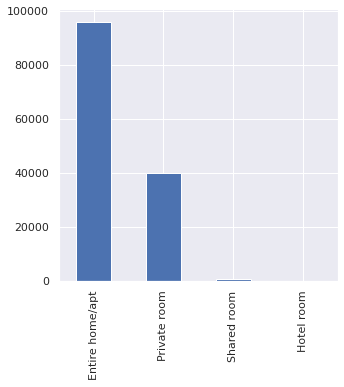

In [84]:
print('this is the division of the types of rooms in airbnb listing:\n')
sns.set(rc = {'figure.figsize':(5,5)})
combinedlistings['room_type'].value_counts().plot.bar()

this is division of the cancellation policy withtin the airbnb listings:



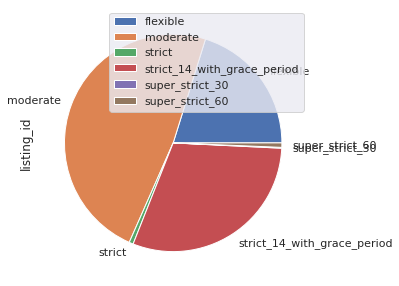

In [85]:
print('this is division of the cancellation policy withtin the airbnb listings:\n')
combinedlistings.groupby(['cancellation_policy']).count().plot(kind='pie', y='listing_id')

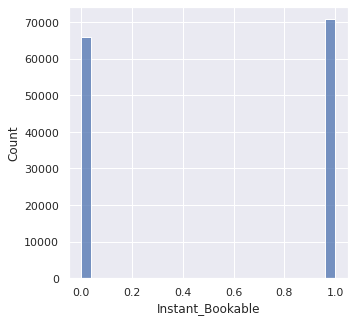

In [86]:
sns.histplot(data=combinedlistings, x="Instant_Bookable")

price distribution of various property listings on airbnb:



(1.0, 250.0)

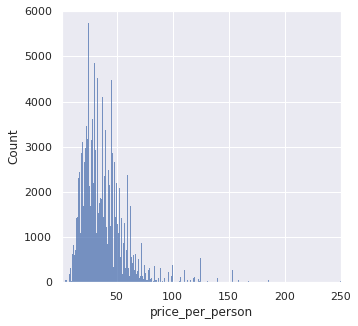

In [87]:
print('price distribution of various property listings on airbnb:\n')
ax = sns.histplot(data=combinedlistings, x="price_per_person")
ax.set_xlim(1,250)


normal distribution of price for various property listings on airbnb:


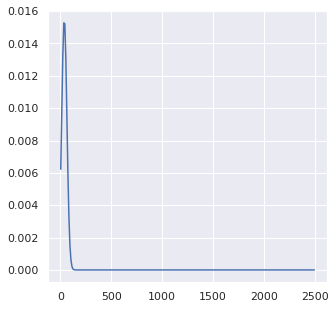

In [88]:
print('normal distribution of price for various property listings on airbnb:')
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics
	
# Plot between -30 and 30 with
# 0.1 steps.
x_axis = np.arange(3.5, 2500, 10)
plt.plot(x_axis, norm.pdf(x_axis, 38.230871, 25.682980))
plt.show()
